# Sampling

## Sampling Techniques Used:
1. RandomUnderSampler
2. SMOTE
3. BorderlineSMOTE
4. RandomOverSampler
5. ADASYN (Adaptive Synthetic Sampling) 

## Classifiers Used:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. SVC (Support Vector Classifier)
5. GradientBoostingClassifier

In [4]:
import pandas as pd
import numpy as np

In [5]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [6]:
df = pd.read_csv('Creditcard_data.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


                                              0.0/294.9 kB ? eta -:--:--
     -                                        10.2/294.9 kB ? eta -:--:--
     -------                               61.4/294.9 kB 812.7 kB/s eta 0:00:01
     ----------                            81.9/294.9 kB 919.0 kB/s eta 0:00:01
     -------------------------              194.6/294.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------        245.8/294.9 kB 1.4 MB/s eta 0:00:01
     -----------------------------------    276.5/294.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


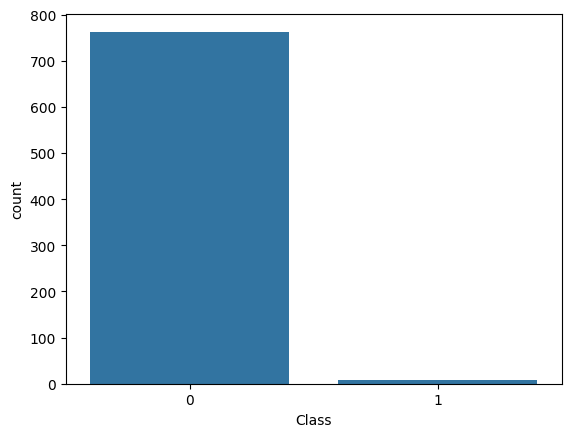

In [10]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Class',data = df)
plt.show()

In [13]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
import pandas as pd

features = df.drop("Class", axis=1)
target = df["Class"]

random_state_value = 51

rus = RandomUnderSampler(random_state=random_state_value)
features_rus, target_rus = rus.fit_resample(features, target)
df_rus = pd.concat([features_rus, target_rus], axis=1)
df_rus.to_csv("data_rus.csv", index=False)

ros = RandomOverSampler(random_state=random_state_value)
features_ros, target_ros = ros.fit_resample(features, target)
df_ros = pd.concat([features_ros, target_ros], axis=1)
df_ros.to_csv("data_ros.csv", index=False)

smote = SMOTE(random_state=random_state_value)
features_smote, target_smote = smote.fit_resample(features, target)
df_smote = pd.concat([features_smote, target_smote], axis=1)
df_smote.to_csv("data_smote.csv", index=False)

bs = BorderlineSMOTE(random_state=random_state_value)
features_bs, target_bs = bs.fit_resample(features, target)
df_bs = pd.concat([features_bs, target_bs], axis=1)
df_bs.to_csv("data_bs.csv", index=False)

ad = ADASYN(random_state=random_state_value)
features_ad, target_ad = ad.fit_resample(features, target)
df_ad = pd.concat([features_ad, target_ad], axis=1)
df_ad.to_csv("data_ad.csv", index=False)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

datasets = ["data_ros.csv",
            "data_rus.csv",
            "data_smote.csv",
            "data_bs.csv",
            "data_ad.csv"]

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          GradientBoostingClassifier()]

sampling_techniques = ['RandomUnderSampler', 'RandomOverSampler', 'SMOTE', 'BorderlineSMOTE', 'ADASYN']

results = []

for dataset, sampling_technique in zip(datasets, sampling_techniques):
    try:
        df = pd.read_csv(dataset)
    except FileNotFoundError:
        print(f"Error: File {dataset} not found. Check the file path.")
        continue

    X = df.drop("Class", axis=1)
    y = df["Class"]

    for model, model_name in zip(models, ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'GradientBoostingClassifier']):
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(Y_test, y_pred)
        results.append({'Sampling': sampling_technique, 'Classifier': model_name, 'Accuracy': 100 * accuracy})

results_df = pd.DataFrame(results)
results_df.head()


,Sampling,Classifier,Accuracy
0,RandomUnderSampler,LogisticRegression,91.503268
1,RandomUnderSampler,DecisionTreeClassifier,99.346405
2,RandomUnderSampler,RandomForestClassifier,99.673203
3,RandomUnderSampler,SVC,69.607843
4,RandomUnderSampler,GradientBoostingClassifier,99.673203


In [21]:
pivot_df = results_df.pivot_table(index='Classifier', columns='Sampling', values='Accuracy')
pivot_df.to_csv('final.csv')

In [22]:
pivot_df.head()

Sampling,ADASYN,BorderlineSMOTE,RandomOverSampler,RandomUnderSampler,SMOTE
Classifier,,,,,
DecisionTreeClassifier,98.039216,99.019608,25.0,99.346405,97.385621
GradientBoostingClassifier,98.692810,99.346405,25.0,99.673203,99.019608
LogisticRegression,91.503268,98.039216,25.0,91.503268,90.849673
RandomForestClassifier,99.346405,100.000000,75.0,99.673203,99.673203
SVC,69.281046,83.660131,0.0,69.607843,72.549020
